In [15]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


In [16]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()


C:\Users\aditya\AppData\Local\Temp\ipykernel_4276\2879242367.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(train_Y[i])])


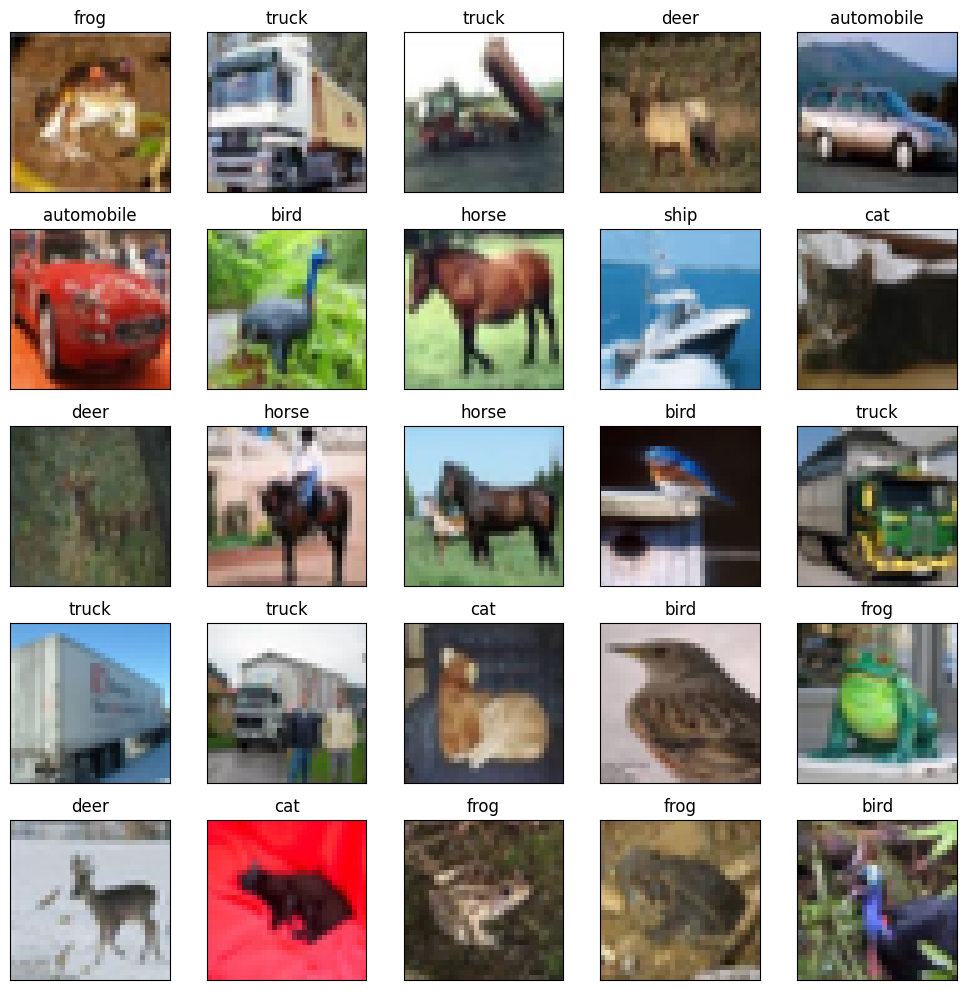

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i])
    plt.title(class_names[int(train_Y[i])])
plt.tight_layout()
plt.show()

In [18]:
print("Train X:", train_X.shape)
print("Train Y:", train_Y.shape)
print("Test X:", test_X.shape)
print("Test Y:", test_Y.shape)

Train X: (50000, 32, 32, 3)
Train Y: (50000, 1)
Test X: (10000, 32, 32, 3)
Test Y: (10000, 1)


In [19]:
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

In [20]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)


In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) 

C:\Users\aditya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
sgd = SGD(learning_rate=0.01, momentum=0.9, decay=(0.01/50), nesterov=False)


C:\Users\aditya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [23]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,336,726 (16.54 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,168,364 (8.27 MB)

In [24]:
history = model.fit(train_X, train_Y, epochs=50, batch_size=64, validation_split=0.2, verbose=1)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 53ms/step - accuracy: 0.2226 - loss: 2.0904 - val_accuracy: 0.4364 - val_loss: 1.5672
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.4344 - loss: 1.5493 - val_accuracy: 0.5349 - val_loss: 1.2933
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.5266 - loss: 1.3094 - val_accuracy: 0.5970 - val_loss: 1.1319
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.5870 - loss: 1.1585 - val_accuracy: 0.6458 - val_loss: 1.0062
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.6329 - loss: 1.0297 - val_accuracy: 0.6572 - val_loss: 0.9770
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6666 - loss: 0.9484 - val_accuracy: 0.6995 - val_loss: 0.8561
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.6924 - loss: 0.8744 - val_accuracy: 0.7215 - val_loss: 0.7954
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.7205 - loss: 0.7970 - 

In [26]:
loss, acc = model.evaluate(test_X, test_Y, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}")


Test Accuracy: 0.7801


In [29]:
from PIL import Image
import numpy as np

im = Image.open("C:\\Users\\aditya\\Desktop\\project\\Image Classification\\cifar10_samples\\cat.png")
im = im.resize((32, 32))
im = np.array(im)
im = im.astype('float32') / 255.0
im = np.expand_dims(im, axis=0)  

pred_probabilities = model.predict(im)
pred = np.argmax(pred_probabilities, axis=1)[0]

results = {
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
print(f"Predicted Class: {pred}, Label: {results[pred]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: 3, Label: cat
